In [49]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size =1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [51]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [52]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

23.478779006359375 25.778355468463957
88.64358218999257 125.85719960888827
-58.05863012030777 128.60706021656773
-69.14097643332937 43.85653369827466
5.799517452037634 -171.90477319408575
29.29007153484261 156.41941791215015
-76.2832847867918 -2.7101100930624398
-39.10469113197809 140.25620245245204
4.016835966969381 -88.1707465634491
-29.310020966757676 137.6010621891387
-53.52615528556087 -32.492353071282395
-51.045713855314915 154.94564589045956
25.23915346144109 -6.092959148187049
88.64838827674117 -13.180930219896851
-0.09795449607101148 116.83217046040863
23.403837345760437 139.98319225135458
60.53229313858489 9.258386753746805
-81.69833330998102 -86.53050200597956
81.61158894947255 -83.80443513566408
11.18355324635779 12.877154933183817
60.61854229251537 -172.3375304789359
-55.47045972064772 29.00481724788372
34.75156644543162 -103.21277188205013
-16.23497079241514 160.89995226837948
-86.89194707970789 34.30887253334217
-78.75897843732501 34.33634845974703
37.43776258209593 89.3

In [53]:
#Import citipy module
from citipy import citipy

In [54]:
# create a list for holding the cities.
cities = []
#identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
    
#print the city count to confirm sufficient count.
len(cities)

605

In [55]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [56]:
#Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval       ")
print("-------------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | asyut
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | mount gambier
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | saleaula
City not found. Skipping...
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | puerto baquerizo moreno
Processing Record 9 of Set 1 | port augusta
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | taoudenni
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | samarinda
Processing Record 15 of Set 1 | shingu
Processing Record 16 of Set 1 | nesbyen
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | maiduguri
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | port elizabeth


Processing Record 40 of Set 4 | businga
Processing Record 41 of Set 4 | tuatapere
Processing Record 42 of Set 4 | palmer
Processing Record 43 of Set 4 | domoni
Processing Record 44 of Set 4 | hervey bay
Processing Record 45 of Set 4 | malinovoye ozero
Processing Record 46 of Set 4 | gornyak
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 49 of Set 4 | nador
Processing Record 50 of Set 4 | luanda
Processing Record 1 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 5 | razole
Processing Record 3 of Set 5 | barrow
Processing Record 4 of Set 5 | saint-georges
Processing Record 5 of Set 5 | afmadu
City not found. Skipping...
Processing Record 6 of Set 5 | rawannawi
City not found. Skipping...
Processing Record 7 of Set 5 | tasiilaq
Processing Record 8 of Set 5 | ponta do sol
Processing Record 9 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 5 | toro

Processing Record 29 of Set 8 | indramayu
Processing Record 30 of Set 8 | roald
Processing Record 31 of Set 8 | santiago
Processing Record 32 of Set 8 | vao
Processing Record 33 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 34 of Set 8 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 35 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 36 of Set 8 | salalah
Processing Record 37 of Set 8 | jalu
Processing Record 38 of Set 8 | ayia trias
Processing Record 39 of Set 8 | seydi
Processing Record 40 of Set 8 | yumen
Processing Record 41 of Set 8 | yeghegnut
Processing Record 42 of Set 8 | port blair
Processing Record 43 of Set 8 | toliary
City not found. Skipping...
Processing Record 44 of Set 8 | omsukchan
Processing Record 45 of Set 8 | avera
Processing Record 46 of Set 8 | muncie
Processing Record 47 of Set 8 | gabu
Processing Record 48 of Set 8 | sistranda
Processing Record 49 of Set 8 | sabang
Processing Record 50 of 

Processing Record 15 of Set 12 | auki
Processing Record 16 of Set 12 | el dorado
Processing Record 17 of Set 12 | pangkalanbuun
Processing Record 18 of Set 12 | cody
Processing Record 19 of Set 12 | husavik
Processing Record 20 of Set 12 | daraitan
Processing Record 21 of Set 12 | sibolga
Processing Record 22 of Set 12 | gerede
Processing Record 23 of Set 12 | ranong
Processing Record 24 of Set 12 | formosa
Processing Record 25 of Set 12 | karpathos
Processing Record 26 of Set 12 | guaruja
Processing Record 27 of Set 12 | tanout
Processing Record 28 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 29 of Set 12 | nelson bay
Processing Record 30 of Set 12 | grenaa
Processing Record 31 of Set 12 | usinsk
Processing Record 32 of Set 12 | zyryanka
Processing Record 33 of Set 12 | isangel
Processing Record 34 of Set 12 | asau
Processing Record 35 of Set 12 | beysehir
Processing Record 36 of Set 12 | guerrero negro
Processing Record 37 of Set 12 | yarmouth
Processing Record 

In [57]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
#Reorder the colums
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Asyut,EG,2022-07-24 20:28:09,27.1810,31.1837,88.56,21,6,9.60
1,Tiksi,RU,2022-07-24 20:28:09,71.6872,128.8694,45.70,78,5,5.55
2,Mount Gambier,AU,2022-07-24 20:28:09,-37.8333,140.7667,52.32,98,100,8.50
3,Port Alfred,ZA,2022-07-24 20:28:10,-33.5906,26.8910,60.04,56,86,9.71
4,Hasaki,JP,2022-07-24 20:28:10,35.7333,140.8333,75.60,86,65,12.95
5,Hermanus,ZA,2022-07-24 20:28:10,-34.4187,19.2345,52.81,82,0,12.17
6,Puerto Baquerizo Moreno,EC,2022-07-24 20:28:11,-0.9000,-89.6000,76.19,65,40,8.05
7,Port Augusta,AU,2022-07-24 20:28:11,-32.5000,137.7667,53.19,92,49,8.28
8,Chuy,UY,2022-07-24 20:27:56,-33.6971,-53.4616,62.47,95,33,2.53
9,Hobart,AU,2022-07-24 20:28:11,-42.8794,147.3294,44.06,96,20,5.75


In [58]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [59]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

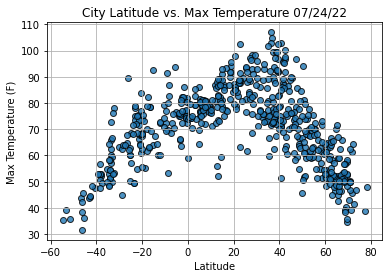

In [60]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

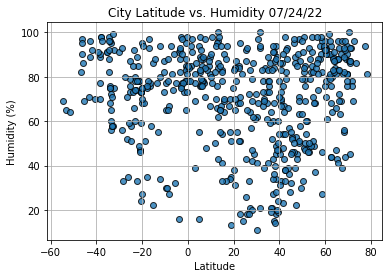

In [61]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

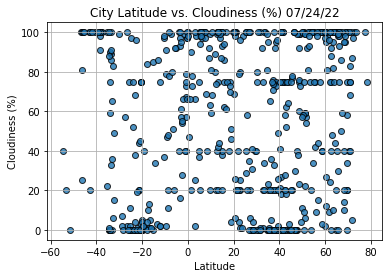

In [62]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

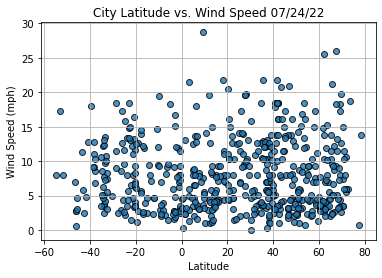

In [63]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [64]:
#Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line.
    line_eq = " y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [65]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

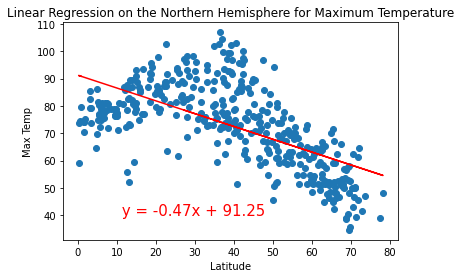

In [66]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10,40))

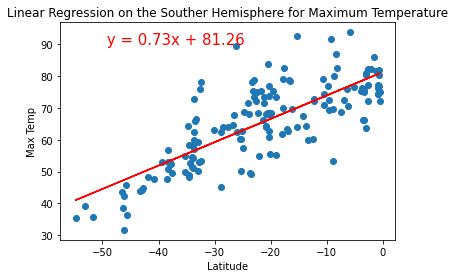

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Souther Hemisphere for Maximum Temperature',
                       'Max Temp', (-50,90))

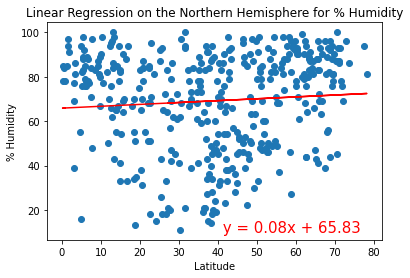

In [70]:
# Linear regression on the Northern Hemisphere
sx_values = northern_hemi_df["Lat"]
sy_values = northern_hemi_df["Humidity"]
#Call the function.
plot_linear_regression(sx_values, sy_values,
                      'Linear Regression on the Northern Hemisphere for % Humidity',
                      '% Humidity',(40,10))

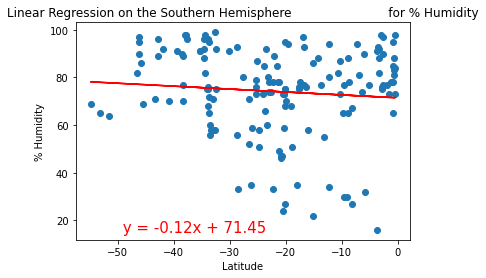

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

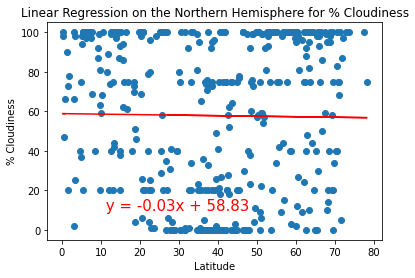

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Cloudiness',
                      '% Cloudiness',(10,10))

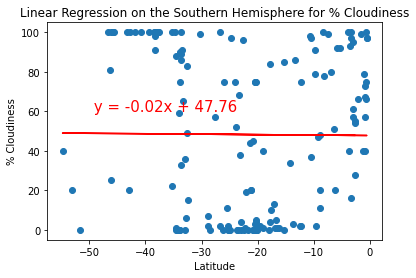

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,60))

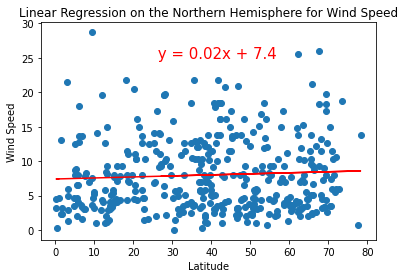

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed',
                       'Wind Speed',(25,25))

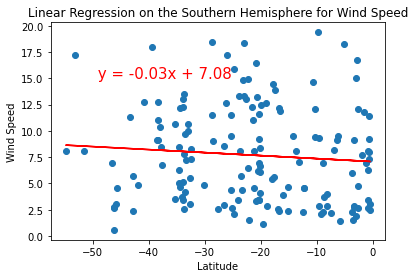

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,15))